In [153]:
import requests
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

print('Imports completed!')

Imports completed!


In [154]:
# Basic structure of a data pipeline
# API to be used to data pipeline
url = 'https://restcountries.com/v3.1/all'

# Extract data
def extract_data(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"API request failed with status code: {response.status_code}")

# Get data from JSON
def transform_data(raw_data):
    country_data = []
    
    for data in raw_data:
        # Parameters to be looked at
        name = data['name']['common']
        region = data['region']
        population = data['population']
        lat = data['latlng'][0]
        lng = data['latlng'][1]

        # Add to empty array
        country_data.append({
            'name': name,
            'region': region,
            'population': population,
            'lat': lat,
            'lng': lng
        })
   
    # Create country dataframe
    country_df = pd.DataFrame(country_data)
    return country_df

# Load data in sql database
def load_data(df, table_name, connection_string):
    engine = create_engine(connection_string)
    df.to_sql(table_name, engine, if_exists='replace', index=False)
    print(f'Data has been loaded to the {table_name} database')

# Define a pipeline for ETL functions  
def run_pipeline():
    raw_data = extract_data(url)
    cleaned_data = transform_data(raw_data)
    connection_string = 'sqlite:///countries_data.db'
    load_data(cleaned_data, 'countries', connection_string)
    
run_pipeline()

Data has been loaded to the countries database


In [155]:
# Pull from database
query = """ 
    SELECT * 
    FROM countries 
    WHERE population > 10000
"""

df = pd.read_sql(query, con='sqlite:///countries_data.db')
df

,name,region,population,lat,lng
0,Grenada,Americas,112519,12.116667,-61.666667
1,Switzerland,Europe,8654622,47.000000,8.000000
2,Sierra Leone,Africa,7976985,8.500000,-11.500000
3,Hungary,Europe,9749763,47.000000,20.000000
4,Taiwan,Asia,23503349,23.500000,121.000000
...,...,...,...,...,...
226,Belgium,Europe,11555997,50.833333,4.000000
227,Israel,Asia,9216900,31.470000,35.130000
228,New Zealand,Oceania,5084300,-41.000000,174.000000
229,Nicaragua,Americas,6624554,13.000000,-85.000000


<Axes: xlabel='name'>

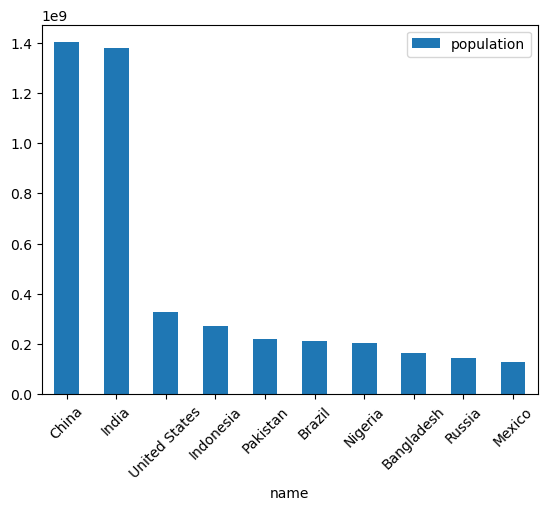

In [156]:
# What are the top 10 countries with the largest population
query = """
    SELECT
        name,
        population
    FROM countries
    ORDER BY population DESC
    LIMIT 10;
"""
df = pd.read_sql(query, con='sqlite:///countries_data.db')
df.plot.bar(x='name',
            y='population',
            rot=45)

In [162]:
# Which countries are in a specific region?
query = """
    SELECT *
    FROM countries
    WHERE region = 'Asia'
"""
df = pd.read_sql(query, con='sqlite:///countries_data.db')
df

,name,region,population,lat,lng
0,Taiwan,Asia,23503349,23.500000,121.000000
1,Indonesia,Asia,273523621,-5.000000,120.000000
2,Laos,Asia,7275556,18.000000,105.000000
3,China,Asia,1402112000,35.000000,105.000000
4,Yemen,Asia,29825968,15.000000,48.000000
5,Uzbekistan,Asia,34232050,41.000000,64.000000
6,Sri Lanka,Asia,21919000,7.000000,81.000000
7,Palestine,Asia,4803269,31.900000,35.200000
8,Bangladesh,Asia,164689383,24.000000,90.000000
9,Singapore,Asia,5685807,1.366667,103.800000


In [158]:
# What is the average population of countries in each region?
query = """
    SELECT
        region,
        AVG(population) AS avg_population
    FROM countries
    GROUP BY region
"""
df = pd.read_sql(query, con='sqlite:///countries_data.db')
df

,region,avg_population
0,Africa,2.308636e+07
1,Americas,1.823172e+07
2,Antarctic,2.860000e+02
3,Asia,9.209190e+07
4,Europe,1.409310e+07
5,Oceania,1.597016e+06


In [159]:
# Which countries are located in the Northern Hemisphere?
query = """
    SELECT
        name,
        lat
    FROM countries
    WHERE lat > 0;
"""
df = pd.read_sql(query, con='sqlite:///countries_data.db')
df

,name,lat
0,Grenada,12.116667
1,Switzerland,47.000000
2,Sierra Leone,8.500000
3,Hungary,47.000000
4,Taiwan,23.500000
...,...,...
189,Portugal,39.500000
190,Belgium,50.833333
191,Israel,31.470000
192,Nicaragua,13.000000


In [160]:
# Which regions have the highest number of countries?
query = """
    SELECT
        region,
        COUNT(*) AS country_count
    FROM countries
    GROUP BY region
    ORDER BY country_count DESC;
"""
df = pd.read_sql(query, con='sqlite:///countries_data.db')
df

,region,country_count
0,Africa,59
1,Americas,56
2,Europe,53
3,Asia,50
4,Oceania,27
5,Antarctic,5


In [161]:
# What is the cumulative population of countries as they are sorted by size?
query = """
    SELECT
        name,
        population,
        SUM(population) OVER (ORDER BY population DESC) AS cumulative_population
    FROM countries;
"""
df = pd.read_sql(query, con='sqlite:///countries_data.db')
df

,name,population,cumulative_population
0,China,1402112000,1402112000
1,India,1380004385,2782116385
2,United States,329484123,3111600508
3,Indonesia,273523621,3385124129
4,Pakistan,220892331,3606016460
...,...,...,...
245,United States Minor Outlying Islands,300,7777721477
246,Pitcairn Islands,56,7777721533
247,South Georgia,30,7777721563
248,Bouvet Island,0,7777721563
